Timedeltas: calculating a change in time.
date_ranges: creating equally spaced intervals

In [1]:
import pandas as pd
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQcpVvVioO23cndDwr1UmKhndrSq6ES6ZUKZ4fkBBqIAavd1_coVPO_yeOye-Ub-cAWlkX3psJvOU8o/pub?output=csv"
df = pd.read_csv(url)
df['datetime'] = pd.to_datetime(df['date'])

In [2]:
# set 'datetime' as the index
df = df.set_index('datetime')

In [3]:
# make the time delta
delta_3d = pd.to_timedelta(3,'D')
delta_3d

Timedelta('3 days 00:00:00')

In [4]:
max_date = df['humidity'].idxmax()
# calc 3 days BEFORE
pre_max = max_date - delta_3d
pre_max

Timestamp('2016-12-29 00:00:00')

In [5]:
# calc 3 days AFTER
post_max = max_date + delta_3d
post_max

Timestamp('2017-01-04 00:00:00')

In [6]:
mean_windspeed = df.loc[pre_max:post_max,'wind_speed'].mean()
mean_windspeed

4.89791666675

In [7]:
## making a date range to cover the pre-max to post-max window
date_range = pd.date_range(pre_max, post_max)
date_range

DatetimeIndex(['2016-12-29', '2016-12-30', '2016-12-31', '2017-01-01',
               '2017-01-02', '2017-01-03', '2017-01-04'],
              dtype='datetime64[ns]', freq='D')

In [8]:
# this will give an error
df.loc[date_range,'wind_speed'].mean()

KeyError: "[Timestamp('2017-01-02 00:00:00'), Timestamp('2017-01-03 00:00:00'), Timestamp('2017-01-04 00:00:00')] not in index"

In [9]:
ts = df['meantemp'].copy()
ts

datetime
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

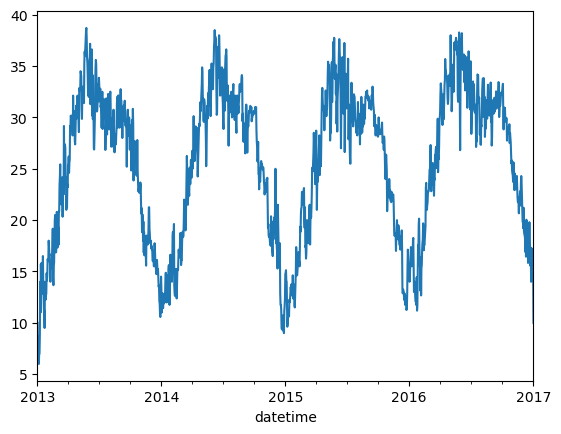

In [10]:
ax = ts.plot();

In [11]:
# Figure Sizes for Time Series
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']

[6.4, 4.8]

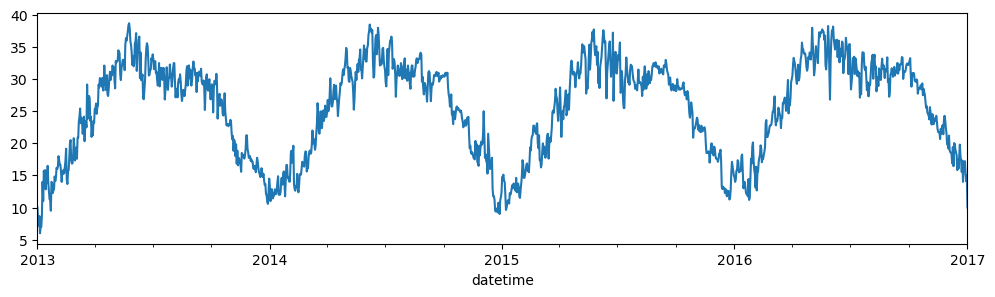

In [12]:
## plot a 12x3 figure
ts.plot(figsize=(12,3));

In [13]:
## setting the default figsize for this notebook
plt.rcParams['figure.figsize'] = (12,3)

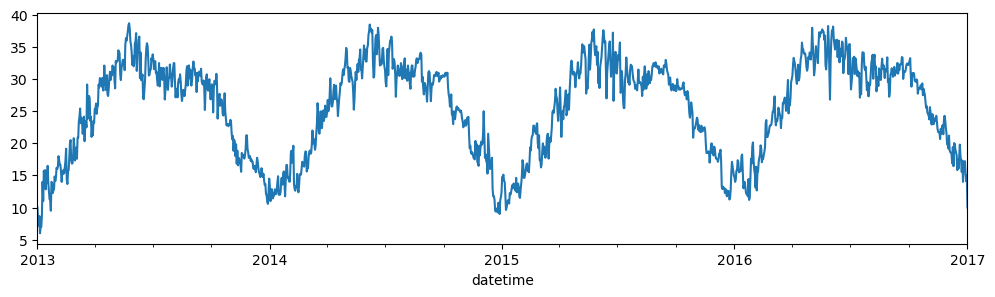

In [14]:
ax = ts.plot();

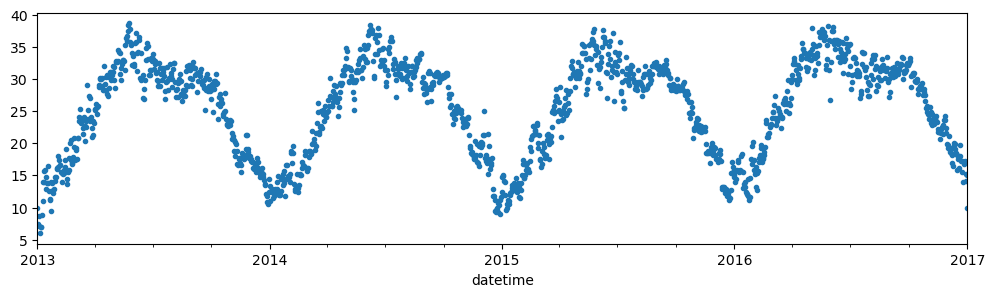

In [15]:
#Plot - Style/ Level of Detail

## we can also visualize just the markers without the line
ax = ts.plot(style='.');

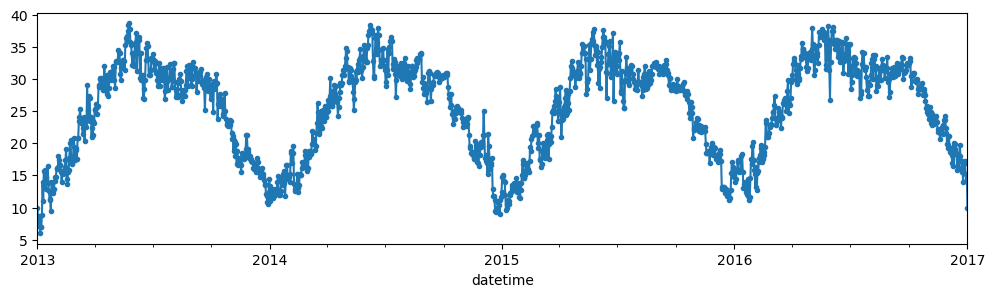

In [16]:
## Using style to add markers
ax = ts.plot(style='.-')

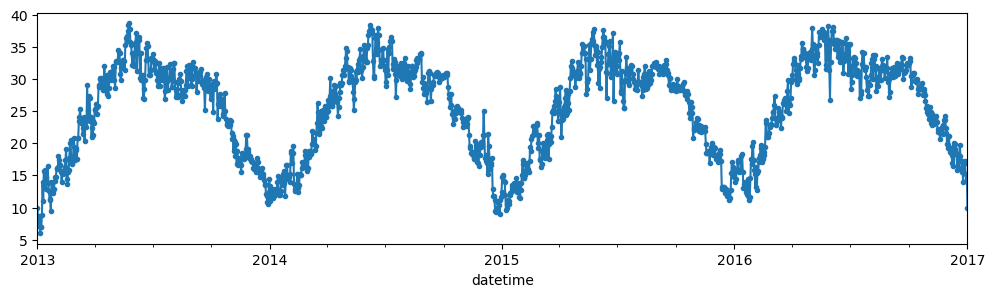

In [17]:
## Using marker to add markers
ax = ts.plot(marker='.')

In [18]:
#Formatting Date Xticks

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [19]:
## creating our tick locators and formatters
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
# create the formatter to display 3-letter month names + 2-digit year
fmt_months = mdates.DateFormatter("%B-%y")

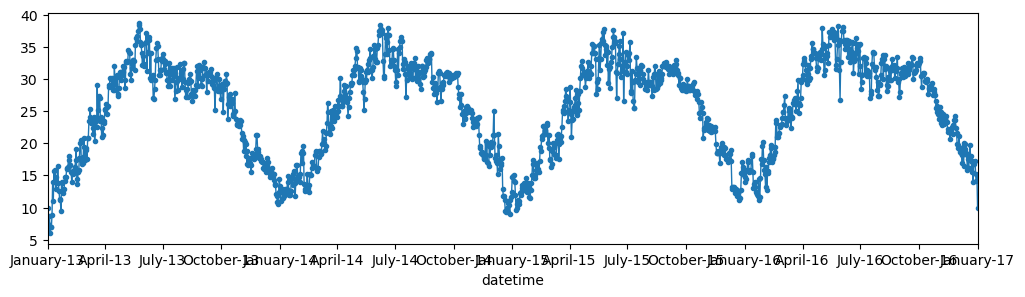

In [20]:
## Plot the time series with pandas
## Adding . markers and a thinner line
ax = ts.plot(marker='.',lw=1);
ax.xaxis.set_major_locator(loc_3months)
ax.xaxis.set_major_formatter(fmt_months)

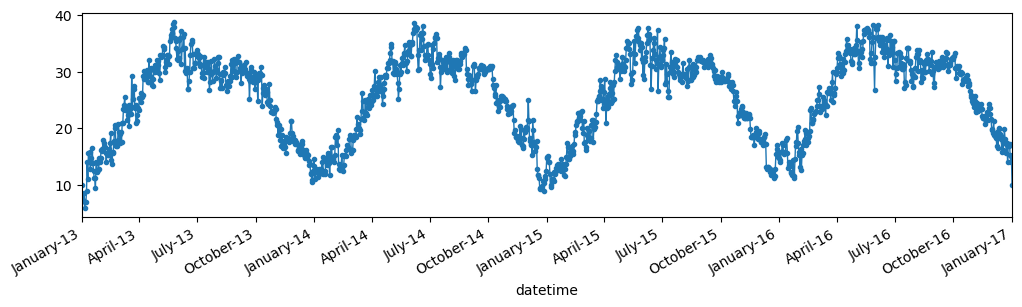

In [21]:
##  Plot the time series with pandas
ax = ts.plot(marker='.',lw=1);
ax.xaxis.set_major_locator(loc_3months)
ax.xaxis.set_major_formatter(fmt_months)
##  Using ax.get_figure()
fig = ax.get_figure()
fig.autofmt_xdate()

In [22]:
## creating our tick locators and formatters
## for minor month ticks
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

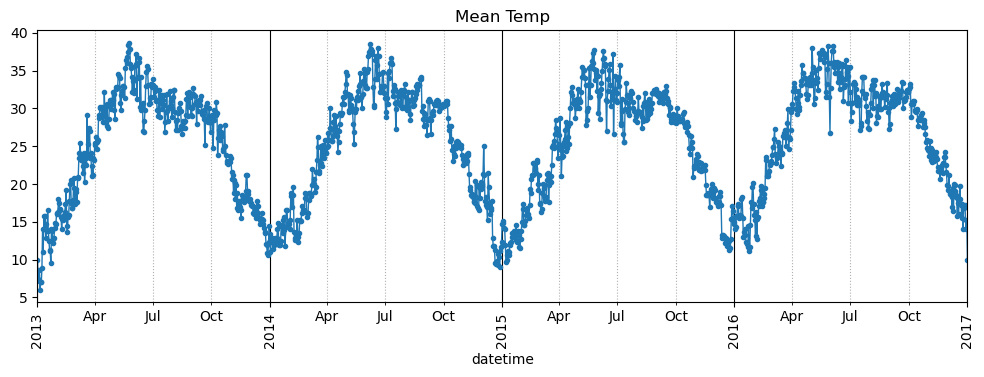

In [23]:
## Make the fig and axis first
# plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,4))
ts.plot(ax=ax,title='Mean Temp',marker='.',lw=1)
## customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
## customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

/var/folders/fc/lxtc0_tj33b65krh167ynf300000gn/T/ipykernel_26670/3965544766.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' )


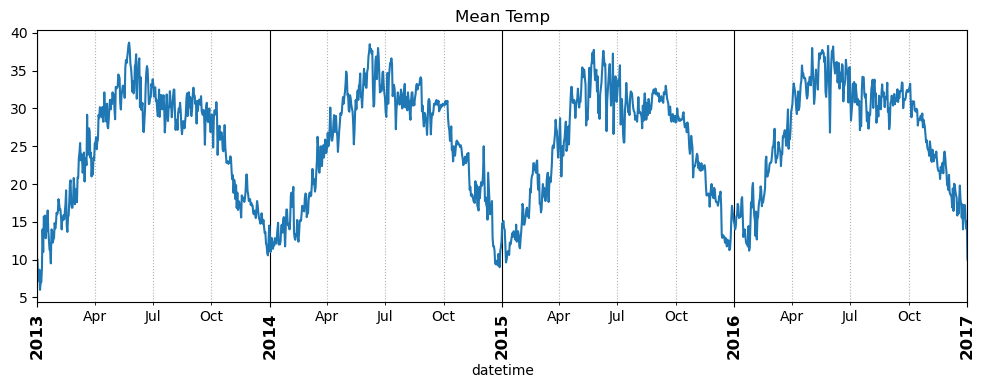

In [24]:
##  Make the fig and axis first
#  plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,4))
ts.plot(ax=ax,title='Mean Temp');
##  saving current xticks
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' ) 
##  customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
##  customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
##  Making major/minor gridlines visually distince
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

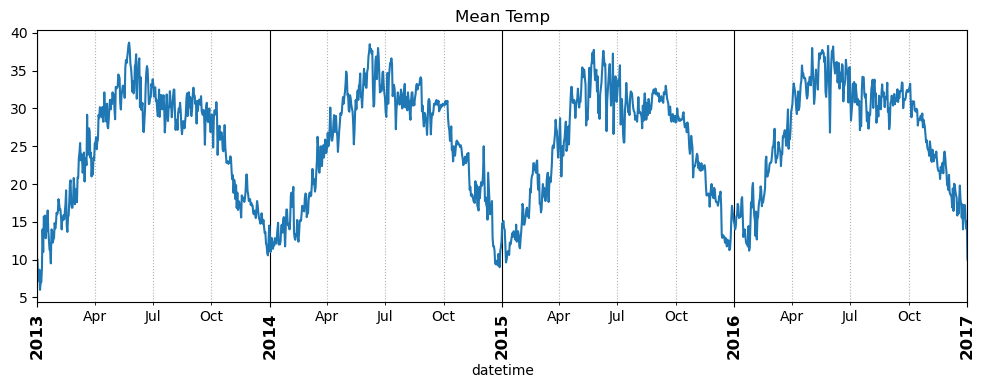

In [25]:
##  Make the fig and axis first
#  plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,4))
ts.plot(ax=ax,title='Mean Temp');
##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' ) 
##  customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
##  customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
##  Making major/minor gridlines visually distince
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

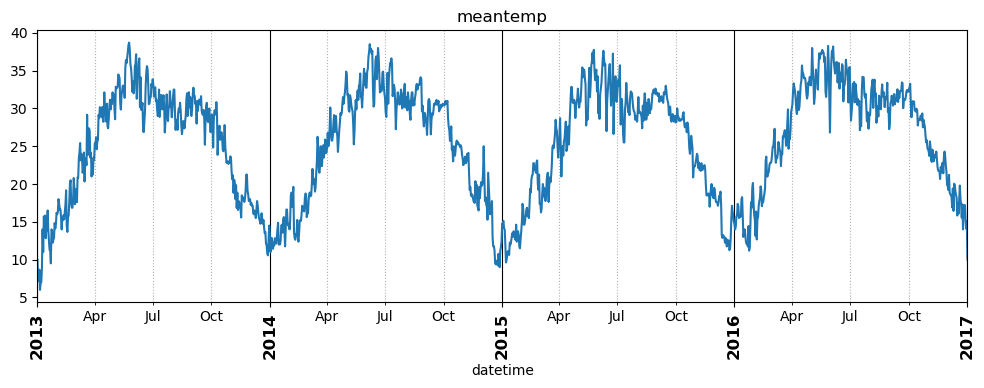

In [26]:
## we've done enough customization that it makes sense to bundle this in a function
def plot_dates(ts,figsize=(12,4),xtick_fontsize='large', xtick_fontweight='bold',
               title= None):## Make the fig and axis first
    
    if title is None:
        title = ts.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax,title=title);
    
    ## creating our tick locators and formatters
    ## for minor month ticks
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize=xtick_fontsize, 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax
plot_dates(ts);

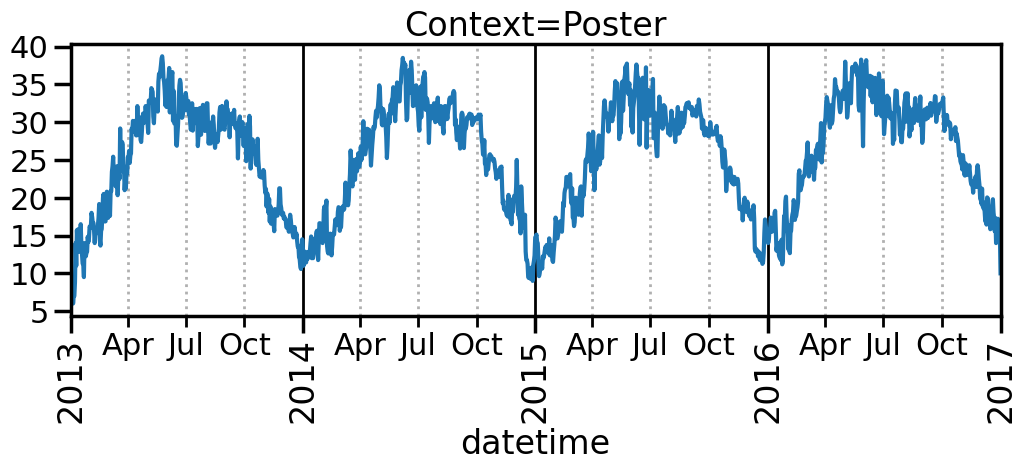

In [27]:
# OVERHAULING MATPLOTLIB DEFAULTS 

import seaborn as sns
with sns.plotting_context('poster'):    
    fig,ax = plot_dates(ts,xtick_fontsize=None,xtick_fontweight=None,title="Context=Poster")

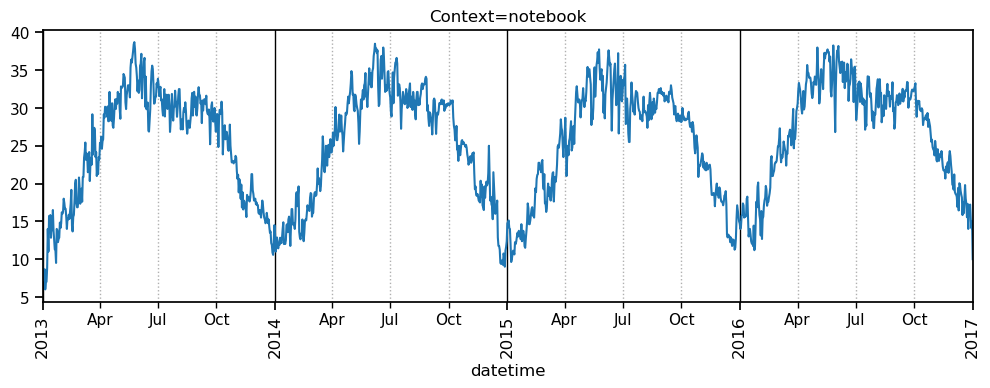

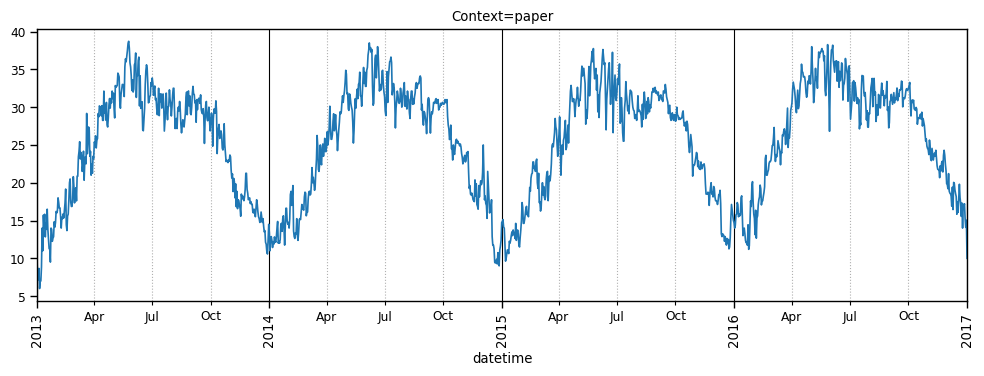

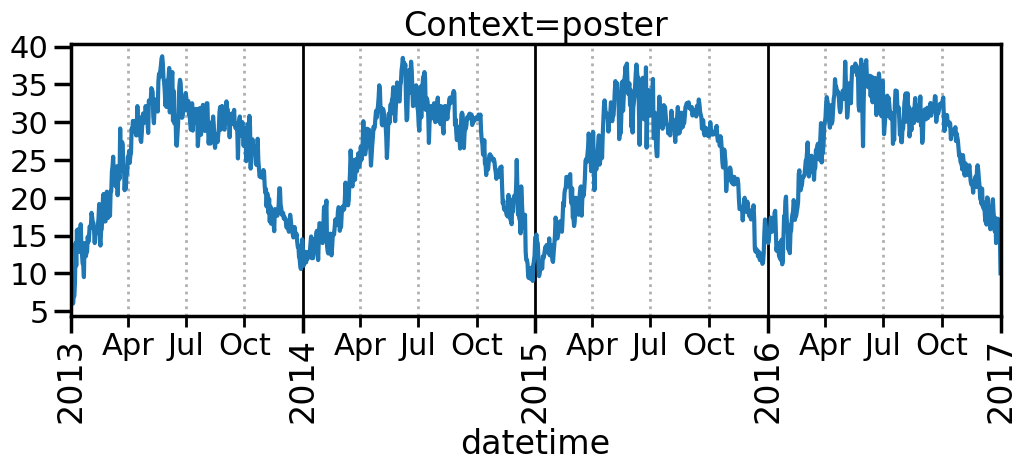

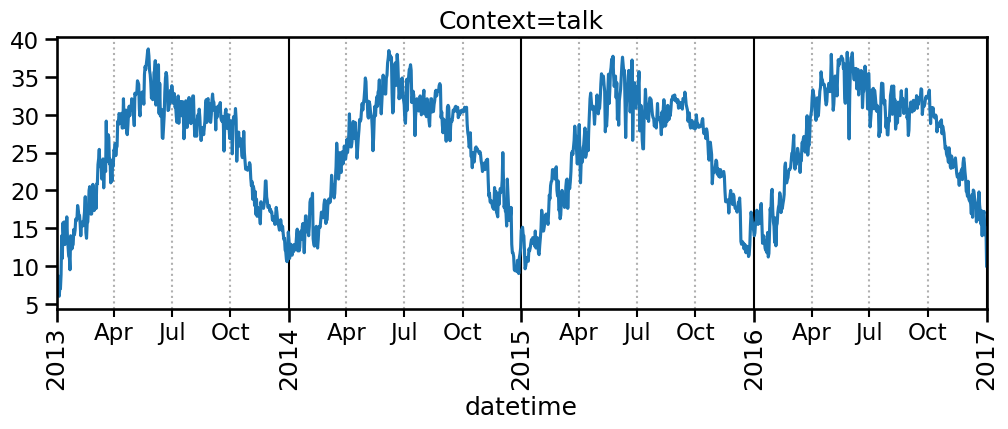

In [28]:
## temporarily changing context
for context in ['notebook','paper','poster','talk']:
    with sns.plotting_context(context):
        fig,ax = plot_dates(ts,xtick_fontsize=None,xtick_fontweight=None,
                            title=f"Context={context}")

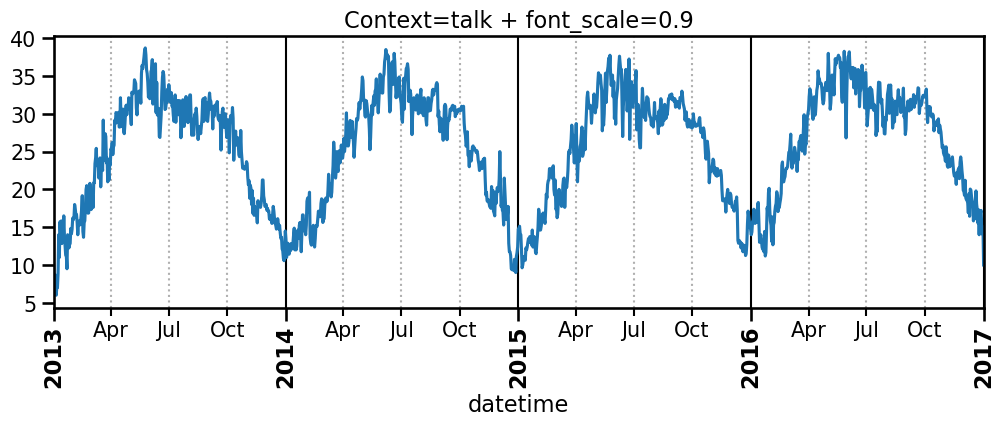

In [29]:
with sns.plotting_context("talk", font_scale=0.9):
    fig,ax = plot_dates(ts,xtick_fontsize=None,
                        xtick_fontweight="bold",
                        title=f"Context=talk + font_scale=0.9")

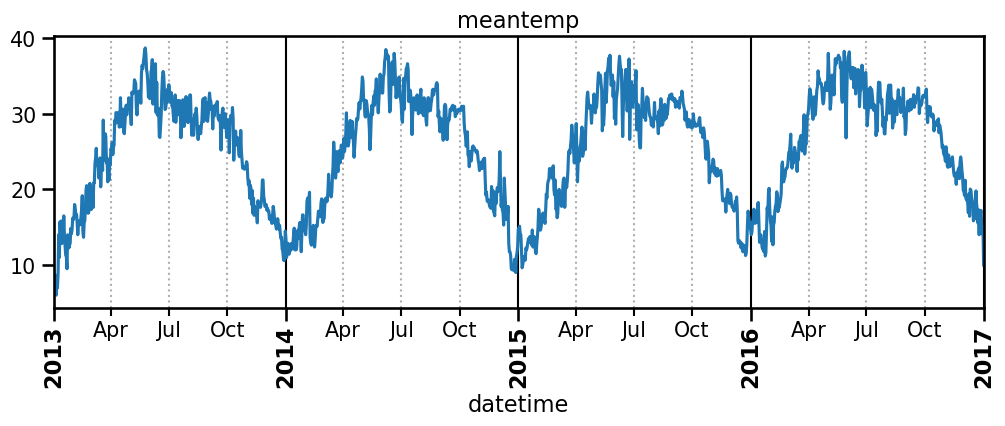

In [30]:
## making the settings permanent for the notebook:
sns.set_context("talk", font_scale=0.9)
fig,ax = plot_dates(ts,xtick_fontsize=None,
                    xtick_fontweight="bold")

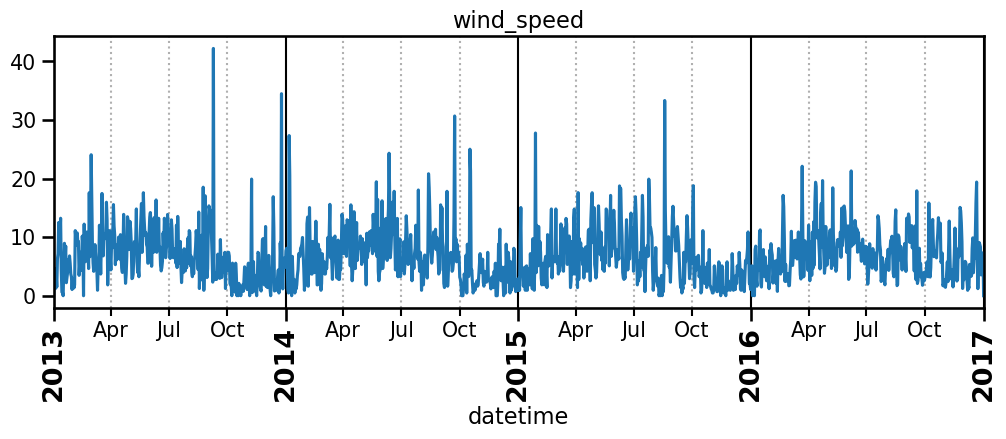

In [31]:
##  Visualize wind_speed instead of meantemp
ts = df['wind_speed'].copy()
plot_dates(ts);

In [32]:
# RESAMPLING AND IMPUTATION

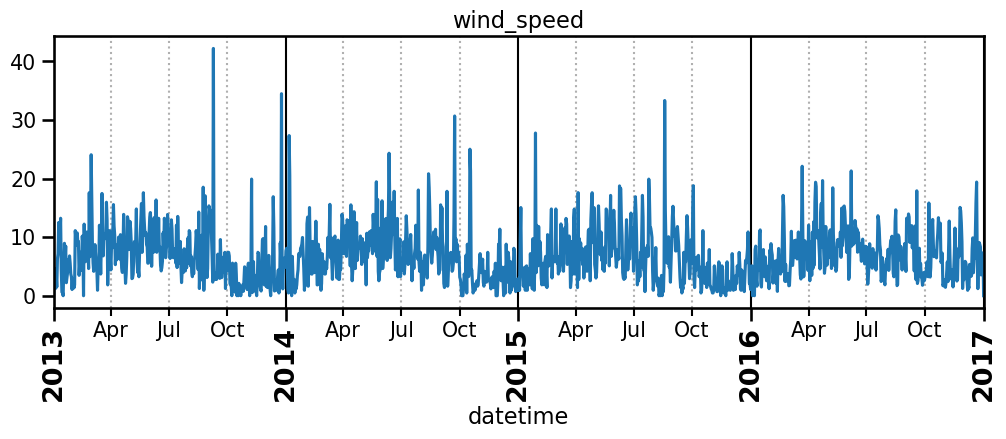

In [33]:
ts = df['wind_speed'].copy()
plot_dates(ts);

In [34]:
ts.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq=None)

In [35]:
# setting the frequency

##  set daily frequency
ts = ts.asfreq('D')
##  preview the index again
ts.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq='D')

In [36]:
#  remake ts
ts = df['wind_speed'].copy()
ts.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq=None)

In [37]:
##  try making daily data into an hourly frequency
ts_H = ts.asfreq("H")
ts_H

datetime
2013-01-01 00:00:00    0.0
2013-01-01 01:00:00    NaN
2013-01-01 02:00:00    NaN
2013-01-01 03:00:00    NaN
2013-01-01 04:00:00    NaN
                      ... 
2016-12-31 20:00:00    NaN
2016-12-31 21:00:00    NaN
2016-12-31 22:00:00    NaN
2016-12-31 23:00:00    NaN
2017-01-01 00:00:00    0.0
Freq: H, Name: wind_speed, Length: 35065, dtype: float64

In [38]:
ts_MS = ts.asfreq("MS")
ts_MS.name = "asfreq"
ts_MS.head()

datetime
2013-01-01     0.000000
2013-02-01     2.220000
2013-03-01    24.066667
2013-04-01     4.400000
2013-05-01    12.685714
Freq: MS, Name: asfreq, dtype: float64

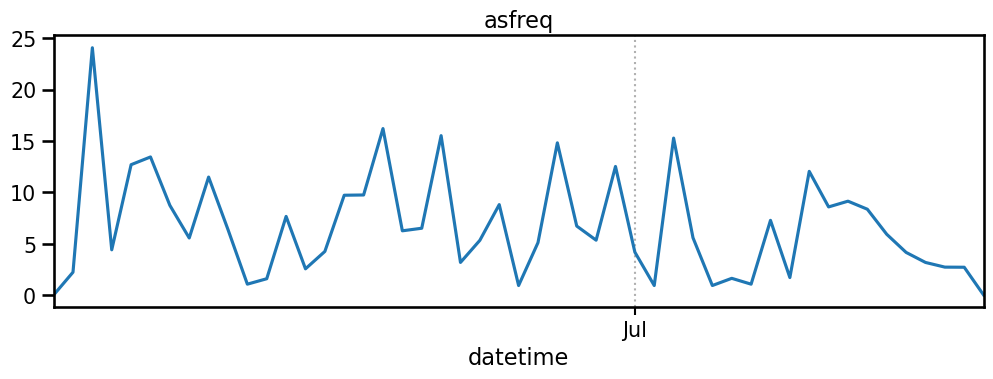

In [39]:
plot_dates(ts_MS);

In [40]:
# downsampling
ts_MS_res = ts.resample("MS").mean()
ts_MS_res.name = 'Resampled'
ts_MS_res.head()

datetime
2013-01-01    4.833913
2013-02-01    7.474090
2013-03-01    8.757270
2013-04-01    8.046385
2013-05-01    8.943452
Freq: MS, Name: Resampled, dtype: float64

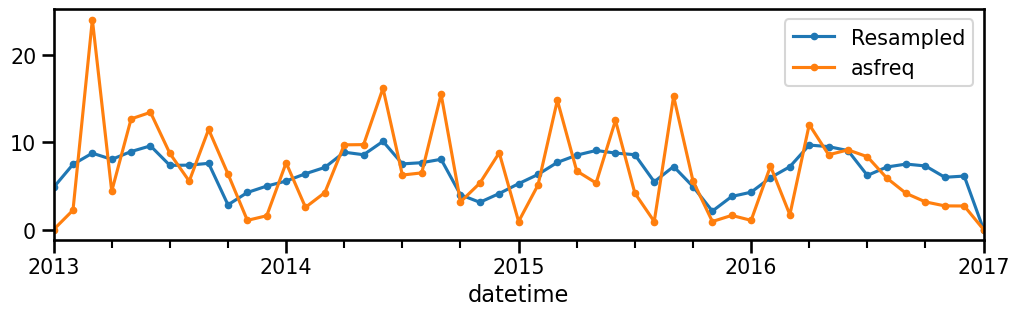

In [41]:
ax = ts_MS_res.plot(style='.-')
ts_MS.plot(style='.-',ax=ax)
ax.legend();

In [42]:
df_ts = df.drop(columns=['date'])
agg_dictionary = {'meantemp':'mean', 'humidity':'max', 'wind_speed':'max','meanpressure':'mean'}
df_W = df_ts.resample("W").agg(agg_dictionary)
df_W

,meantemp,humidity,wind_speed,meanpressure
datetime,,,,
2013-01-06,7.705556,92.000000,4.633333,1017.300000
2013-01-13,12.343537,78.600000,13.228571,1016.632653
2013-01-20,13.642857,92.166667,8.950000,1017.139456
2013-01-27,12.329592,79.666667,6.800000,1020.337075
2013-02-03,15.736905,77.571429,3.700000,1017.020578
...,...,...,...,...
2016-12-04,20.428841,84.000000,9.185714,873.901783
2016-12-11,18.318229,82.833333,5.355556,1015.619483
2016-12-18,17.871140,64.541667,9.879167,1016.727185


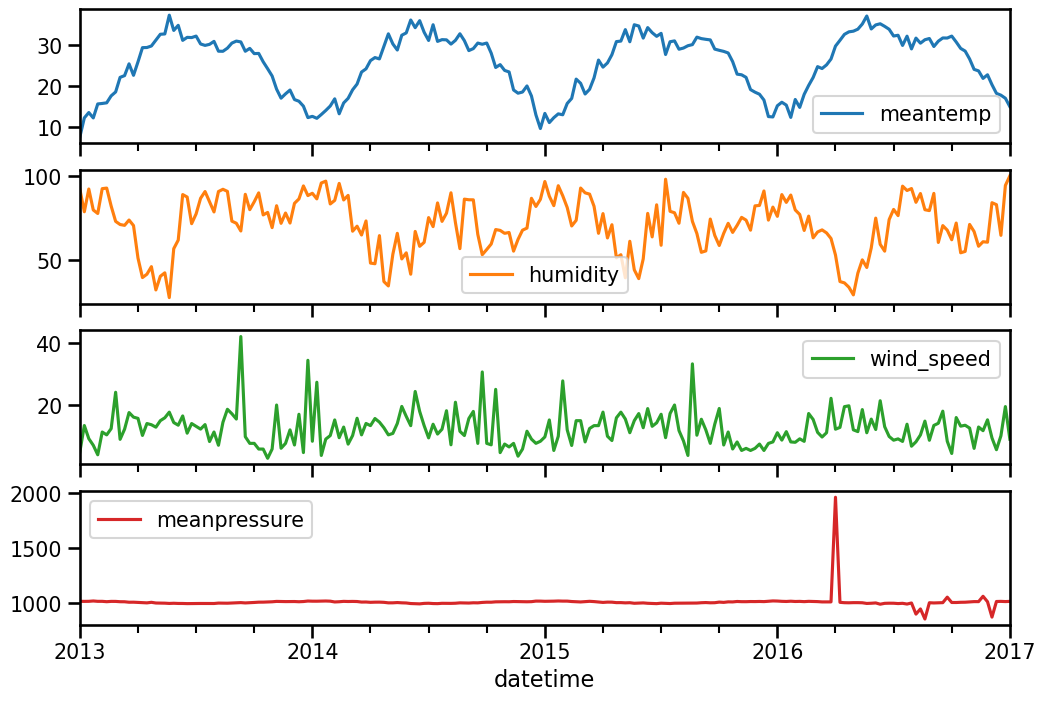

In [43]:
df_W.plot(figsize=(12,8),subplots=True);

In [44]:
# upsampling
ts_H = ts.resample("H").mean()
ts_H.name = 'Resampled'
ts_H.head()

datetime
2013-01-01 00:00:00    0.0
2013-01-01 01:00:00    NaN
2013-01-01 02:00:00    NaN
2013-01-01 03:00:00    NaN
2013-01-01 04:00:00    NaN
Freq: H, Name: Resampled, dtype: float64

<Axes: xlabel='datetime'>

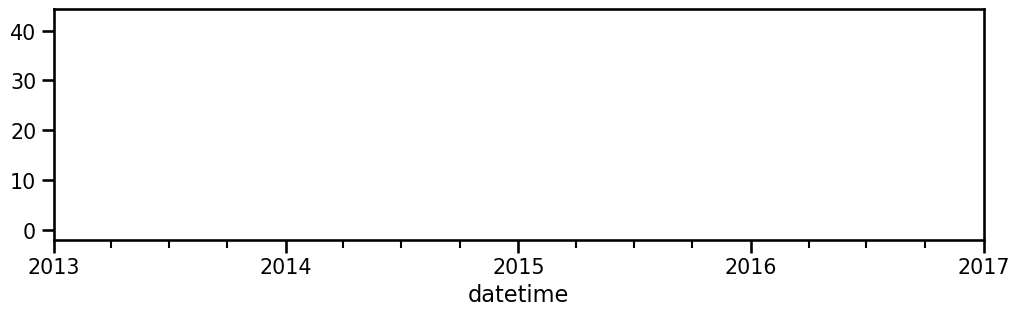

In [45]:
ts_H.plot()

In [46]:
# handling null values
ts = df['wind_speed'].copy()
ts

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    3.700000
                ...   
2016-12-28    3.547826
2016-12-29    6.000000
2016-12-30    6.266667
2016-12-31    7.325000
2017-01-01    0.000000
Name: wind_speed, Length: 1462, dtype: float64

In [47]:
day_of_week = ts.index.day_name()
day_of_week.value_counts()

Tuesday      209
Wednesday    209
Thursday     209
Friday       209
Saturday     209
Sunday       209
Monday       208
Name: datetime, dtype: int64

In [48]:
##  removing all sundays and saturdays
ts = ts[ ~day_of_week.isin(['Sunday','Saturday']) ]
ts.index.day_name().value_counts()

Tuesday      209
Wednesday    209
Thursday     209
Friday       209
Monday       208
Name: datetime, dtype: int64

In [49]:
ts_D = ts.asfreq("D")
ts_D.head(10)

datetime
2013-01-01     0.000000
2013-01-02     2.980000
2013-01-03     4.633333
2013-01-04     1.233333
2013-01-05          NaN
2013-01-06          NaN
2013-01-07     6.300000
2013-01-08     7.142857
2013-01-09    12.500000
2013-01-10     7.400000
Freq: D, Name: wind_speed, dtype: float64

In [50]:
ts_D.isna().sum()

416

In [51]:
##  saving 1 week of values to use for demonstration
example = ts_D.loc['2013-01-01':'2013-01-08']
example

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05         NaN
2013-01-06         NaN
2013-01-07    6.300000
2013-01-08    7.142857
Freq: D, Name: wind_speed, dtype: float64

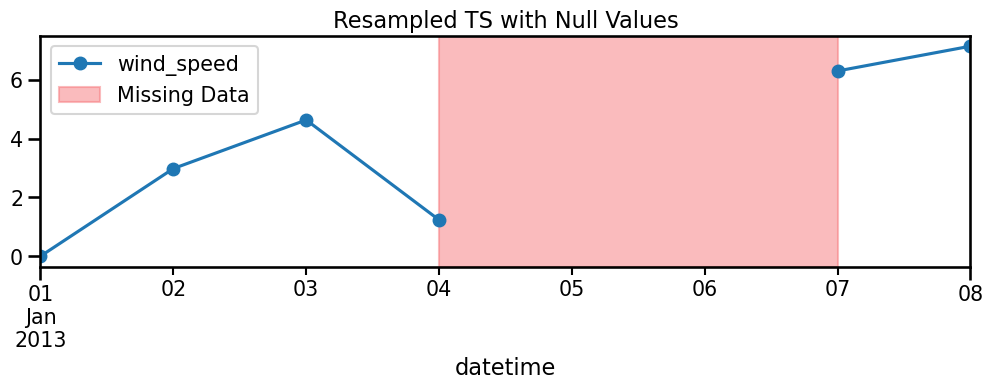

In [52]:
##  Plotting the missing data
ax = example.plot(style='o-', title='Resampled TS with Null Values',)
##  Annotating region with null values to impute
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    1.233333
2013-01-06    1.233333
2013-01-07    6.300000
2013-01-08    7.142857
Freq: D, Name: wind_speed, dtype: float64


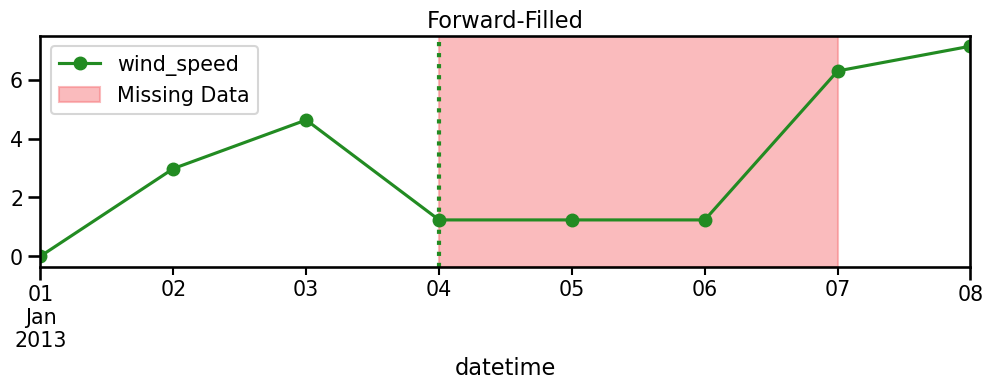

In [53]:
# forward fill

ts_ffill = example.fillna(method='ffill')
print(ts_ffill)
ax = ts_ffill.plot(style='o-',title='Forward-Filled', color='forestgreen');
ax.axvline('01-04-2013',color='forestgreen',lw=3, ls=':')
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    6.300000
2013-01-06    6.300000
2013-01-07    6.300000
2013-01-08    7.142857
Freq: D, Name: wind_speed, dtype: float64


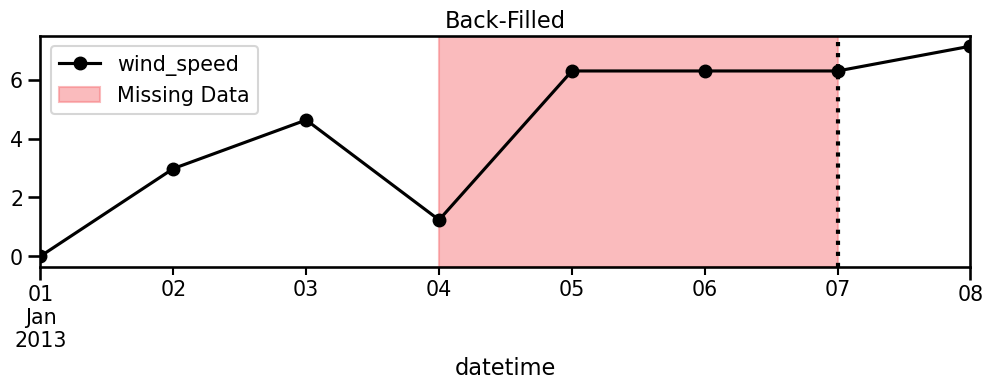

In [54]:
# backward fill

ts_bfill = example.fillna(method='bfill')
print(ts_bfill)
ax = ts_bfill.plot(style='o-',title='Back-Filled',color='k');
ax.axvline("01-07-2013",color='k',lw=3, ls=':')
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    2.922222
2013-01-06    4.611111
2013-01-07    6.300000
2013-01-08    7.142857
Freq: D, Name: wind_speed, dtype: float64


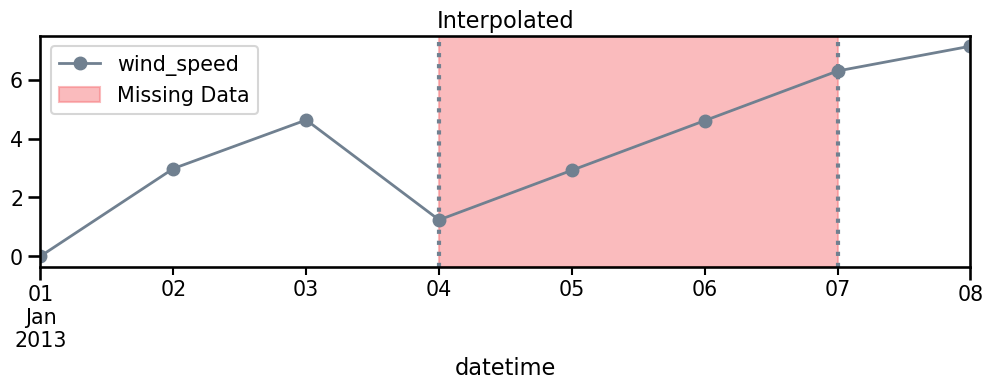

In [55]:
# Interpolate

ts_interp = example.interpolate()
print(ts_interp)
ax = ts_interp.plot(style='o-', color='slategray', lw=2,title='Interpolated');
##  annotating start and end values used by interpolate
ax.axvline('01-04-2013', color='slategray',ls=':',lw=3)
ax.axvline('01-07-2013', color='slategray',ls=':',lw=3)
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

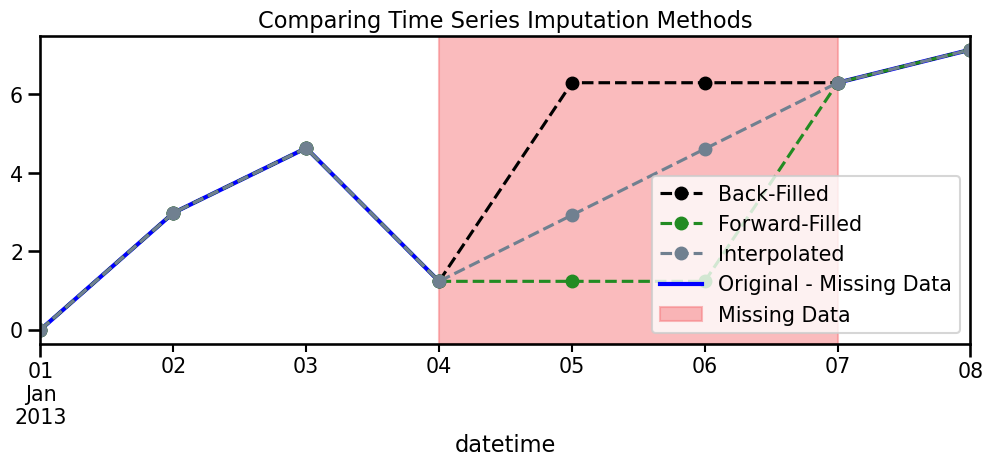

In [57]:
# comparison of imputation methods

fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Comparing Time Series Imputation Methods')
ts_bfill.plot(style='o--',label='Back-Filled',ax=ax, color='k');
ts_ffill.plot(style='o--',label='Forward-Filled',ax=ax, color='forestgreen');
ts_interp.plot(style='o--',label='Interpolated', ax=ax,color='slategray' );
example.plot(style='-', label='Original - Missing Data',ax=ax, color='blue',             lw=3,zorder=-1)
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d',            alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

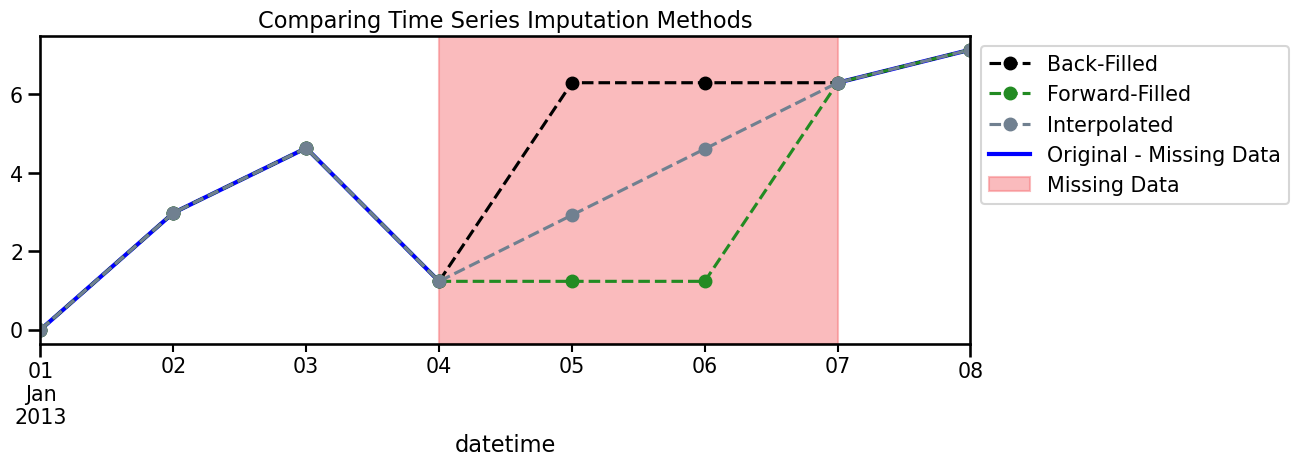

In [58]:
# move legend to outside of plot on right side
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Comparing Time Series Imputation Methods')
ts_bfill.plot(style='o--',label='Back-Filled',ax=ax, color='k');
ts_ffill.plot(style='o--',label='Forward-Filled',ax=ax, color='forestgreen');
ts_interp.plot(style='o--',label='Interpolated', ax=ax,color='slategray' );
example.plot(style='-', label='Original - Missing Data',ax=ax, color='blue', lw=3,zorder=-1)
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend(bbox_to_anchor=[1,1])